# Exploration Data Analysis

Goal of this notebook is to explore and visalize provided data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Allows the use of display() for DataFrames
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

from utils import *

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Load data files

#### Train files

In [3]:
app_train = pd.read_csv('input/application_train.csv.zip')

In [4]:
display(app_train.head(2))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Test files

In [17]:
app_test = pd.read_csv('input/application_test.csv.zip')

In [18]:
display(app_test.head(2))

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


#### Additional files

In [ ]:
bureau = pd.read_csv('input/bureau.csv.zip')

In [ ]:
bureau_balance = pd.read_csv('input/bureau_balance.csv.zip')

In [ ]:
installments_payments = pd.read_csv('input/installments_payments.csv.zip')

In [ ]:
credit_card_balance = pd.read_csv('input/credit_card_balance.csv.zip')

In [ ]:
POS_CASH_balance = pd.read_csv('input/POS_CASH_balance.csv.zip')

In [ ]:
previous_application = pd.read_csv('input/previous_application.csv.zip')

#### Concatenate Files

## Target Value

In [51]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

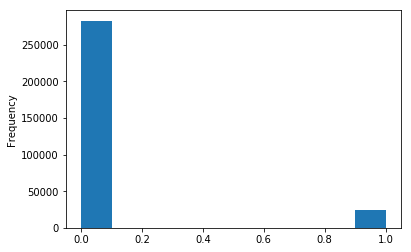

In [5]:
app_train['TARGET'].astype(int).plot.hist();

We can observe [imbalanced class problem](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/).

## Column Types

In [6]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

To work with so many columns it will be conenient to goup them, and work on data set looking at separate groups only. I decided to group data set into logical groups.

- Object type most likely represents a categorical feature or maybe just a text.
- int type may be either numerical discrete value or categorical feature.
- float type is most likely numerical continuous feature.

In [6]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [8]:
app_train.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

If we look at unique values count then it is obvious most of the features are categorical.

In [29]:
int_cols_research = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START']

app_train[int_cols_research].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-2994.202373,2.052463,2.031521,12.063419
std,4363.988632,141275.766519,1509.450419,0.509034,0.502737,3.265832
min,-25229.000000,-17912.000000,-7197.000000,1.000000,1.000000,0.000000
25%,-19682.000000,-2760.000000,-4299.000000,2.000000,2.000000,10.000000
50%,-15750.000000,-1213.000000,-3254.000000,2.000000,2.000000,12.000000
75%,-12413.000000,-289.000000,-1720.000000,2.000000,2.000000,14.000000
max,-7489.000000,365243.000000,0.000000,3.000000,3.000000,23.000000


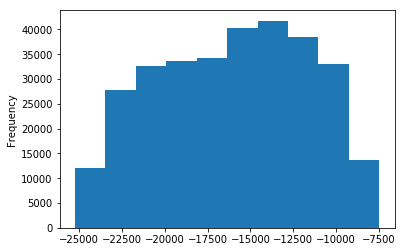

In [30]:
app_train['DAYS_BIRTH'].plot.hist()

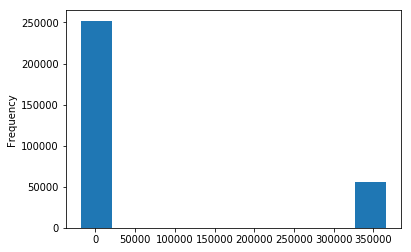

In [40]:
app_train['DAYS_EMPLOYED'].plot.hist()

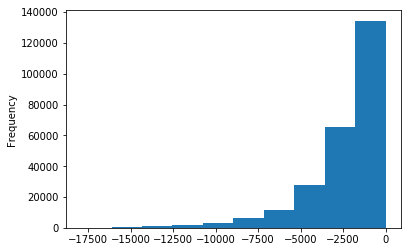

In [39]:
app_train['DAYS_EMPLOYED'][app_train['DAYS_EMPLOYED'] != 365243].plot.hist()

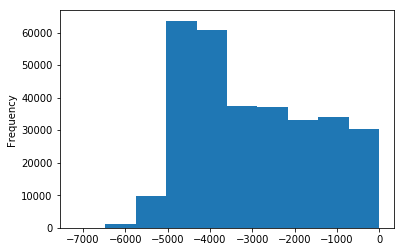

In [31]:
app_train['DAYS_ID_PUBLISH'].plot.hist()

In [24]:
app_train_continuous = app_train.select_dtypes('float64')
#app_train_continuous.describe()

## Correlations

In [ ]:
# pd.scatter_matrix(app_train_continuous, alpha = 0.3, figsize = (65,65), diagonal = 'kde');

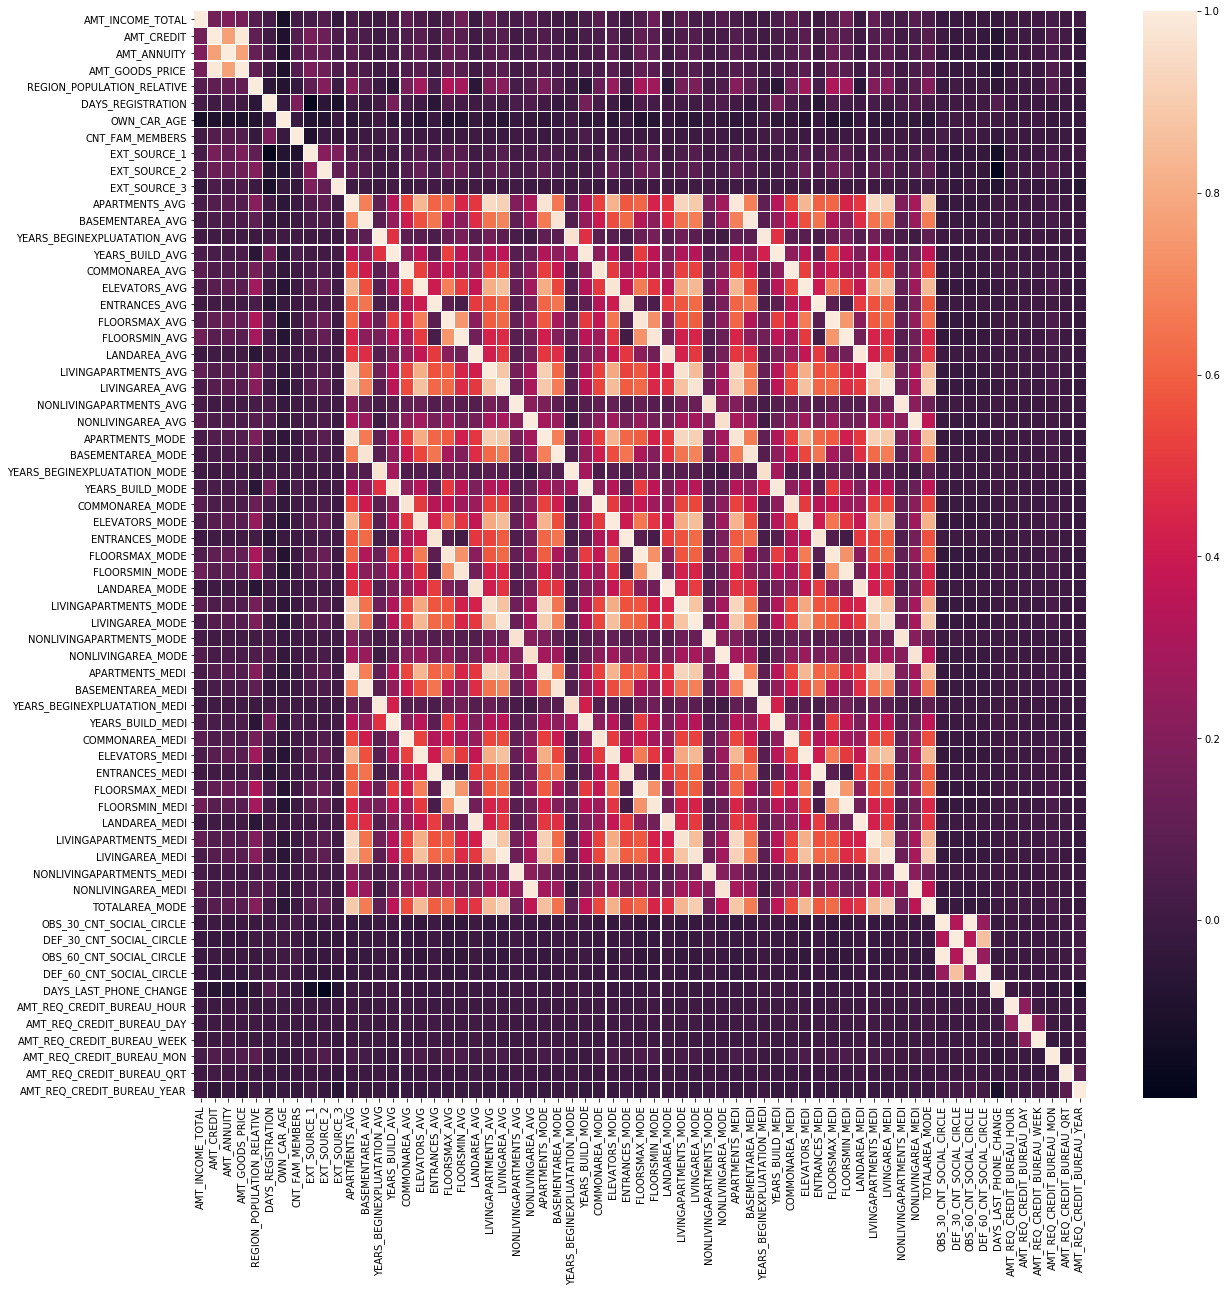

In [33]:
_, ax = plt.subplots(figsize=(20,20))
sns.heatmap(app_train_continuous.corr(), linewidths=.1, ax=ax)

By the correlations heatmap it is seen there are some correlations between appartment's data. Let's split data set and look closer at appartments fields.

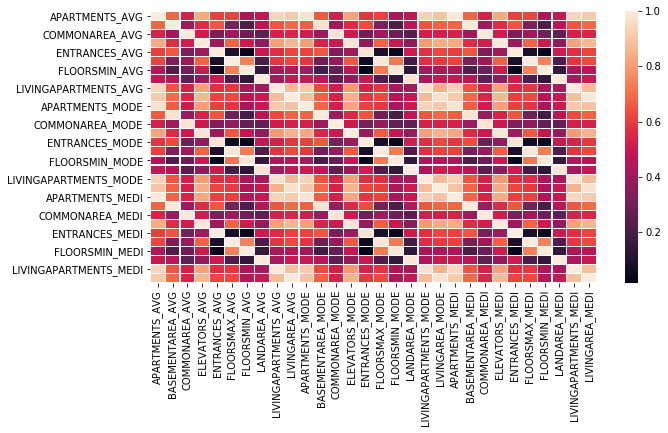

In [26]:
appartment_cols = appartment_avg_cols + appartment_mode_cols + appartment_medi_cols
apt_app_train_cont = app_train_continuous[appartment_cols]
_, ax = plt.subplots(figsize=(10,5))
sns.heatmap(apt_app_train_cont.corr(), linewidths=.1, ax=ax)

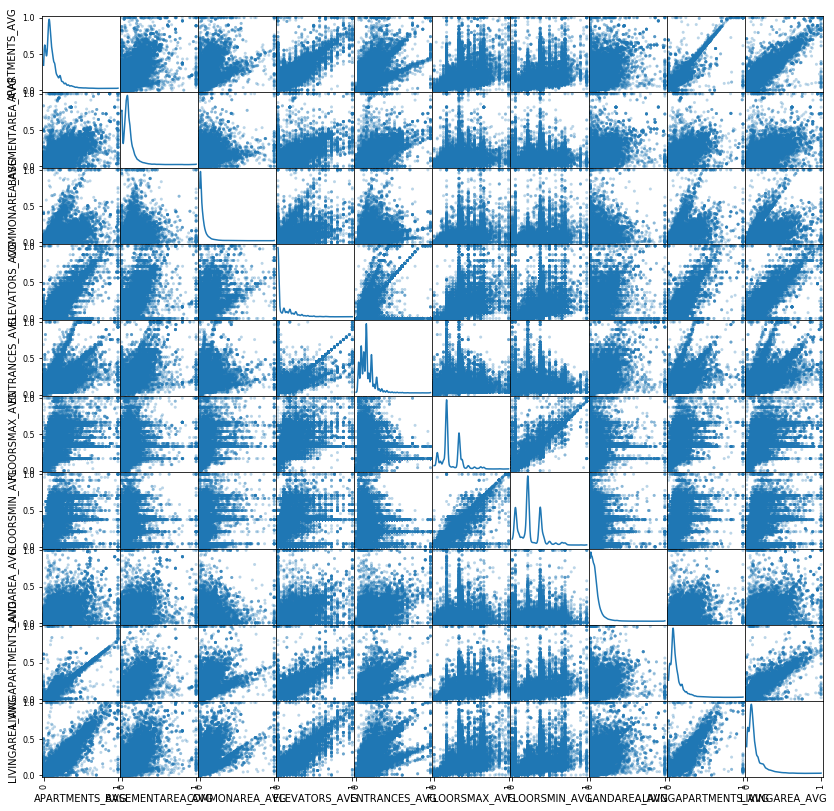

In [16]:
pd.scatter_matrix(app_train_continuous[appartment_avg_cols], alpha=0.3, figsize=(14,14), diagonal='kde');

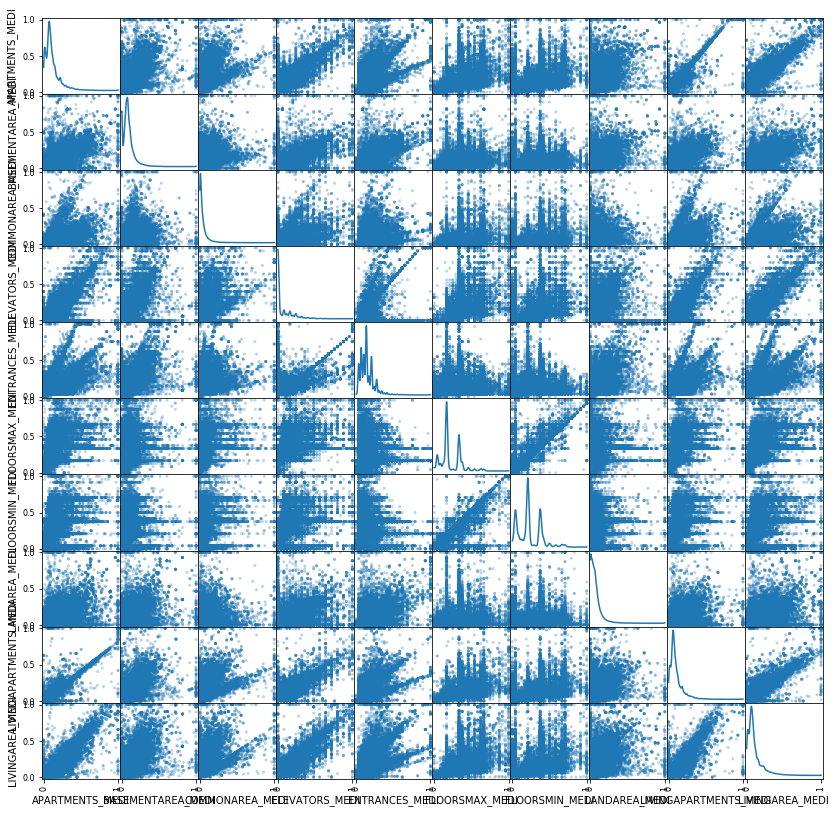

In [17]:
pd.scatter_matrix(app_train_continuous[appartment_medi_cols], alpha=0.3, figsize=(14,14), diagonal='kde');

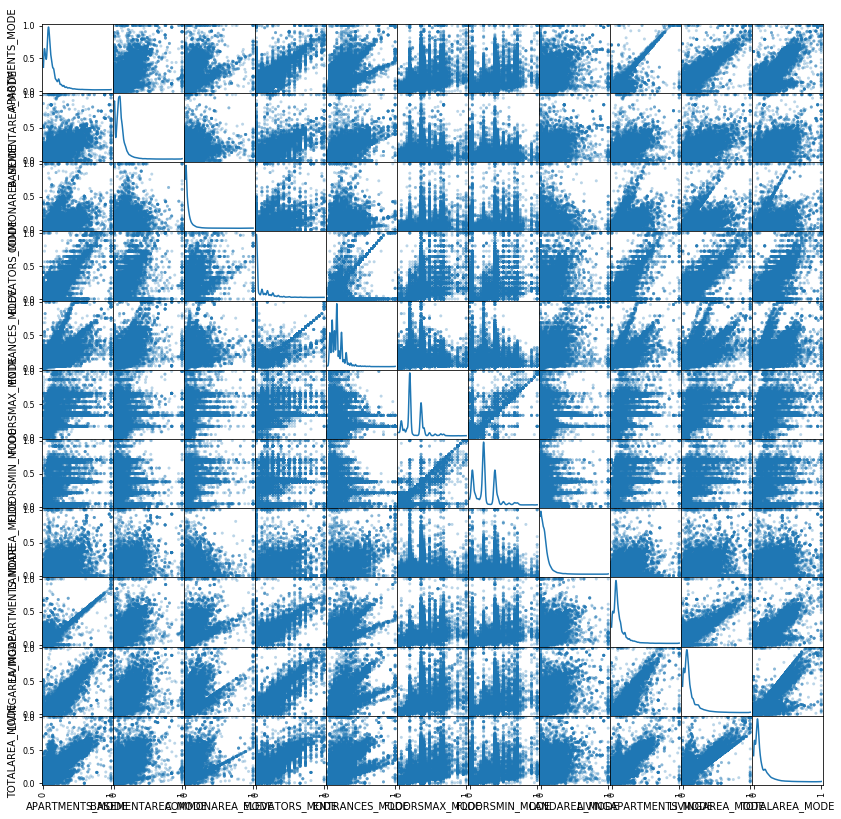

In [18]:
pd.scatter_matrix(app_train_continuous[appartment_mode_cols], alpha=0.3, figsize=(14,14), diagonal='kde');

In [12]:
apt_app_train_cont.describe()

,APARTMENTS_AVG,BASEMENTAREA_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,...,BASEMENTAREA_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE
count,151450.00000,127568.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,...,127568.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,159080.000000
mean,0.11744,0.088442,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,...,0.087955,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.102547
std,0.10824,0.082438,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,...,0.082179,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.107462
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.05770,0.044200,0.007800,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,...,0.043700,0.007900,0.000000,0.069000,0.166700,0.083300,0.018700,0.051300,0.045700,0.041200
50%,0.08760,0.076300,0.021100,0.000000,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,...,0.075800,0.020800,0.000000,0.137900,0.166700,0.208300,0.048700,0.076100,0.074900,0.068800
75%,0.14850,0.112200,0.051500,0.120000,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900,...,0.111600,0.051300,0.120000,0.206900,0.333300,0.375000,0.086800,0.123100,0.130300,0.127600
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are bovious correlations between \_AVG, \_MODE and \_MEDI fields. These fields are candidates to be reduced. I think it's safe to leave e.g. only _AVG fields.

In [5]:
to_drop = appartment_mode_cols + appartment_medi_cols
app_train = app_train.drop(columns=to_drop)

## EDA of Groups

groups:
others  financial_info  days_duration  social_dpd  num_enq  personal_info_flags  docs_flags  
appartment_medi_cols  appartment_mode_cols  appartment_avg_cols

### Others

In [15]:
# app_train[others].describe()

In [14]:
display(compute_missing_values(app_train[others]))

,NaN %,NaN Count
OWN_CAR_AGE,65.990810,202929
OCCUPATION_TYPE,31.345545,96391
NAME_TYPE_SUITE,0.420148,1292
CNT_FAM_MEMBERS,0.000650,2


### Isolation Forset

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import Imputer

data = pd.get_dummies(app_train.drop(columns=['SK_ID_CURR', 'TARGET']))

numerical = data.select_dtypes('float64').columns.tolist()
imputer = Imputer(strategy = 'median')

data[numerical] = imputer.fit_transform(data[numerical])

iforest = IsolationForest(n_estimators=100)
iforest.fit(data)
scores = iforest.decision_function(data)

In [35]:
display(pd.Series(scores).describe())

perct1 = np.percentile(scores, [0.5])
abnidx = np.where(scores < 0)
print(abnidx[0].size)
print(abnidx)
series_score = pd.Series(scores[abnidx])

series_score.describe()

count    307511.000000
mean          0.110481
std           0.024166
min          -0.059963
25%           0.096359
50%           0.113584
75%           0.127882
max           0.171091
dtype: float64

266
(array([   116,    152,   1593,   1630,   1693,   2181,   2845,   2936,
         2972,   3723,   6101,   7061,   7161,   7301,   9173,  10393,
        11202,  11244,  11853,  14143,  16977,  17045,  17183,  19268,
        19641,  21760,  24894,  25046,  25480,  27473,  27902,  32081,
        32346,  34691,  34897,  35048,  35408,  36425,  37949,  38116,
        39250,  39280,  39820,  41212,  41303,  44148,  44571,  45930,
        46193,  47295,  47897,  48037,  48290,  49277,  49288,  50043,
        51770,  51775,  52387,  53309,  53420,  53749,  57629,  58300,
        60314,  61004,  61887,  63152,  63858,  64965,  65206,  66443,
        67044,  67163,  69479,  70539,  72451,  72619,  73034,  74135,
        75731,  78009,  79672,  79960,  80927,  82375,  83438,  85739,
        85925,  86511,  90482,  90872,  91192,  91878,  93571,  94157,
        96979,  98298,  99885, 100741, 101030, 101903, 103754, 104842,
       107777, 108141, 108299, 108574, 108608, 110745, 111068, 111134,
 

count    266.000000
mean      -0.012373
std        0.011682
min       -0.059963
25%       -0.016694
50%       -0.008794
75%       -0.003678
max       -0.000038
dtype: float64

In [36]:
with open('isolation_forest_outliers.npy', 'wb') as f:
    np.save(f, abnidx[0])

## Outliers

It depends on algorithm we will use, if we need to delete outliers on not.

In [68]:
alike_mean_values = app_train.select_dtypes('float64').columns.tolist()
to_remove = ['DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'OWN_CAR_AGE', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_CREDIT']
alike_mean_values = [e for e in alike_mean_values if e not in to_remove]
# alike_mean_values1, alike_mean_values2 = np.array_split(alike_mean_values, 2)
# app_train_continuous.mean().sort_values()

# app_train_continuous.reindex_axis(app_train_continuous.mean().sort_values().index, axis=1)

from scipy import stats
z_scores = stats.zscore(app_train_continuous)
# display(app_train_continuous[(np.abs(z_scores) < 3).all(axis=1)])
# isoutlier_matrix = app_train_continuous.sub(app_train_continuous.mean()).div(app_train_continuous.std()).abs().lt(3)

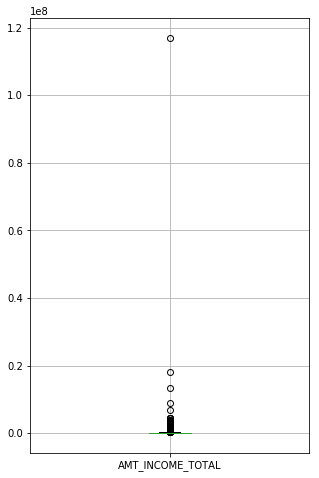

In [47]:
app_train_continuous[['AMT_INCOME_TOTAL']].boxplot(figsize=(5, 8))

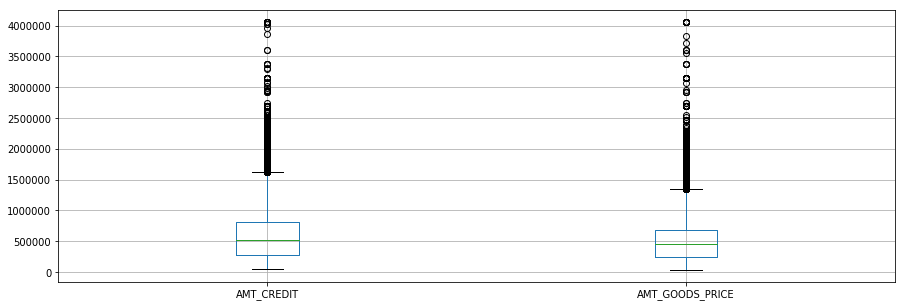

In [37]:
app_train_continuous[['AMT_CREDIT', 'AMT_GOODS_PRICE']].boxplot(figsize=(15, 5))

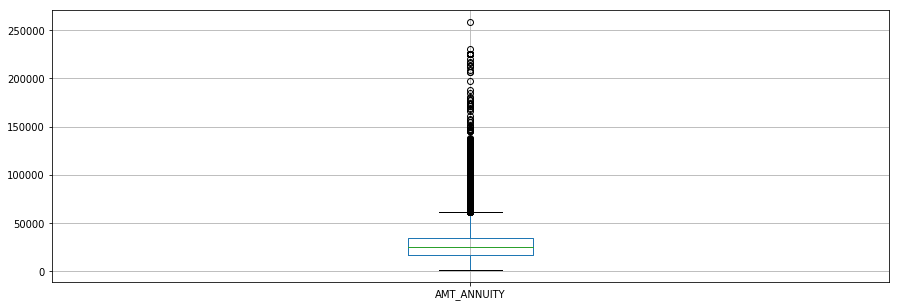

In [46]:
app_train_continuous[['AMT_ANNUITY']].boxplot(figsize=(15, 5))

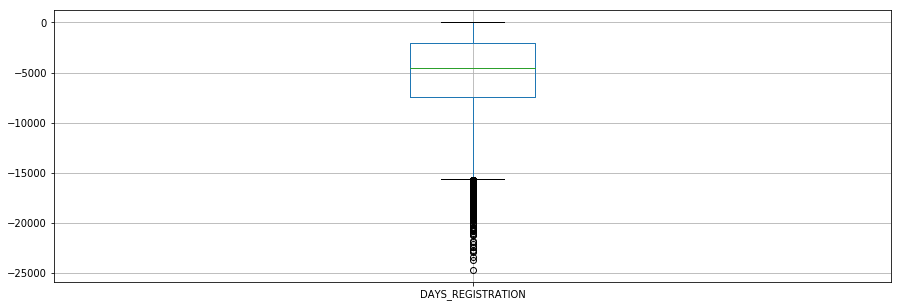

In [45]:
app_train_continuous[['DAYS_REGISTRATION']].boxplot(figsize=(15, 5))

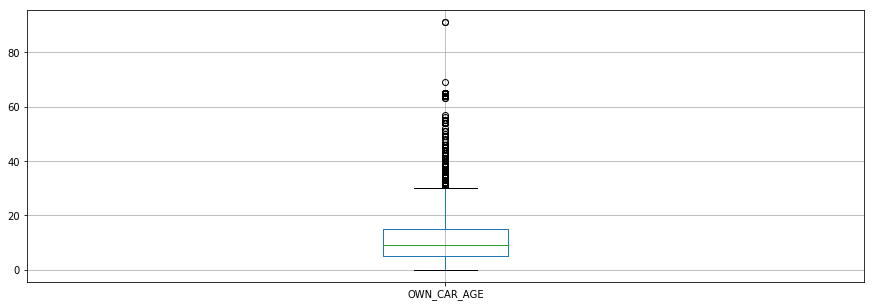

In [42]:
app_train_continuous[['OWN_CAR_AGE']].boxplot(figsize=(15, 5))

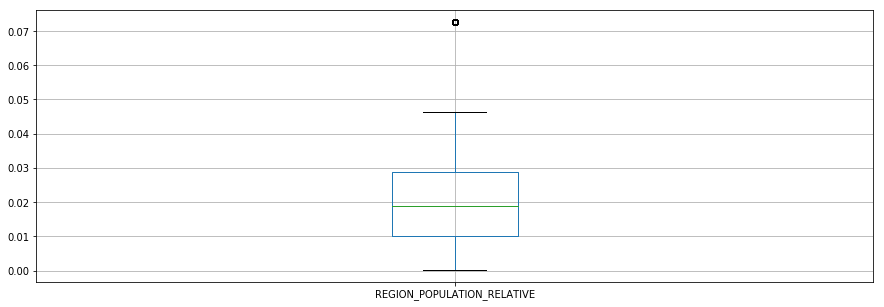

In [43]:
app_train_continuous[['REGION_POPULATION_RELATIVE']].boxplot(figsize=(15, 5))

In [46]:
#outliers_iqr_v = np.vectorize(outliers_iqr, excluded={'k'})

outliers = []
for col in app_train_continuous.columns.tolist():
    _outs = outliers_iqr(app_train_continuous[col].values, k=3)
    #print('Column: %s, outliers=%d' % (col, len(_outs[0])))
    outliers = np.append(outliers, _outs)
    
outliers = set(outliers)

In [47]:
len(outliers)

25350

In [52]:
income_total = app_train_continuous['AMT_INCOME_TOTAL']
income_total_outliers = outliers_iqr(income_total.values, k=3)

app_train.loc[income_total_outliers]['TARGET'].astype(int).value_counts()

0    2852
1     162
Name: TARGET, dtype: int64

## Missing Values

In [34]:
display(compute_missing_values(app_train).head(37))

,NaN %,NaN Count
COMMONAREA_AVG,69.872297,214865
NONLIVINGAPARTMENTS_MODE,69.432963,213514
NONLIVINGAPARTMENTS_MEDI,69.432963,213514
NONLIVINGAPARTMENTS_AVG,69.432963,213514
FONDKAPREMONT_MODE,68.386172,210295
LIVINGAPARTMENTS_AVG,68.354953,210199
FLOORSMIN_AVG,67.848630,208642
YEARS_BUILD_AVG,66.497784,204488
YEARS_BUILD_MEDI,66.497784,204488
YEARS_BUILD_MODE,66.497784,204488


In [16]:
missing_vals = app_train.isnull().sum()
missing_vals = missing_vals[missing_vals != 0].sort_values(ascending=False)
missingvals_cols = missing_vals.index.tolist()

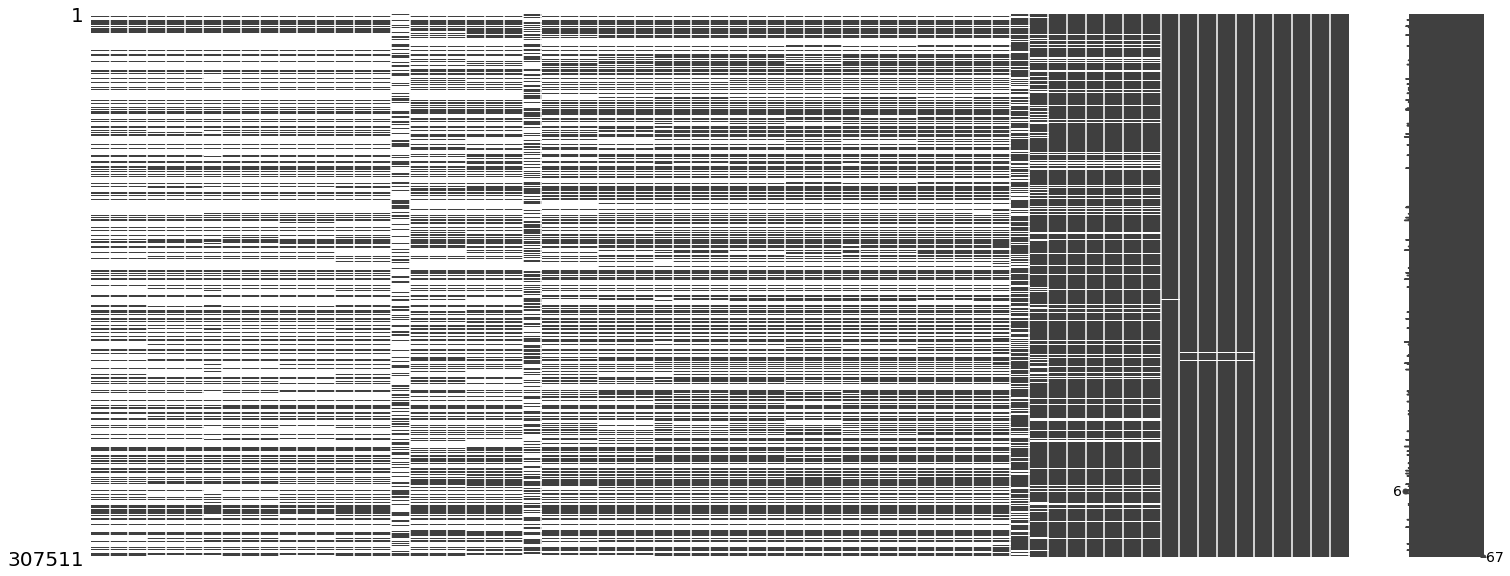

In [17]:
msno.matrix(app_train[missingvals_cols])

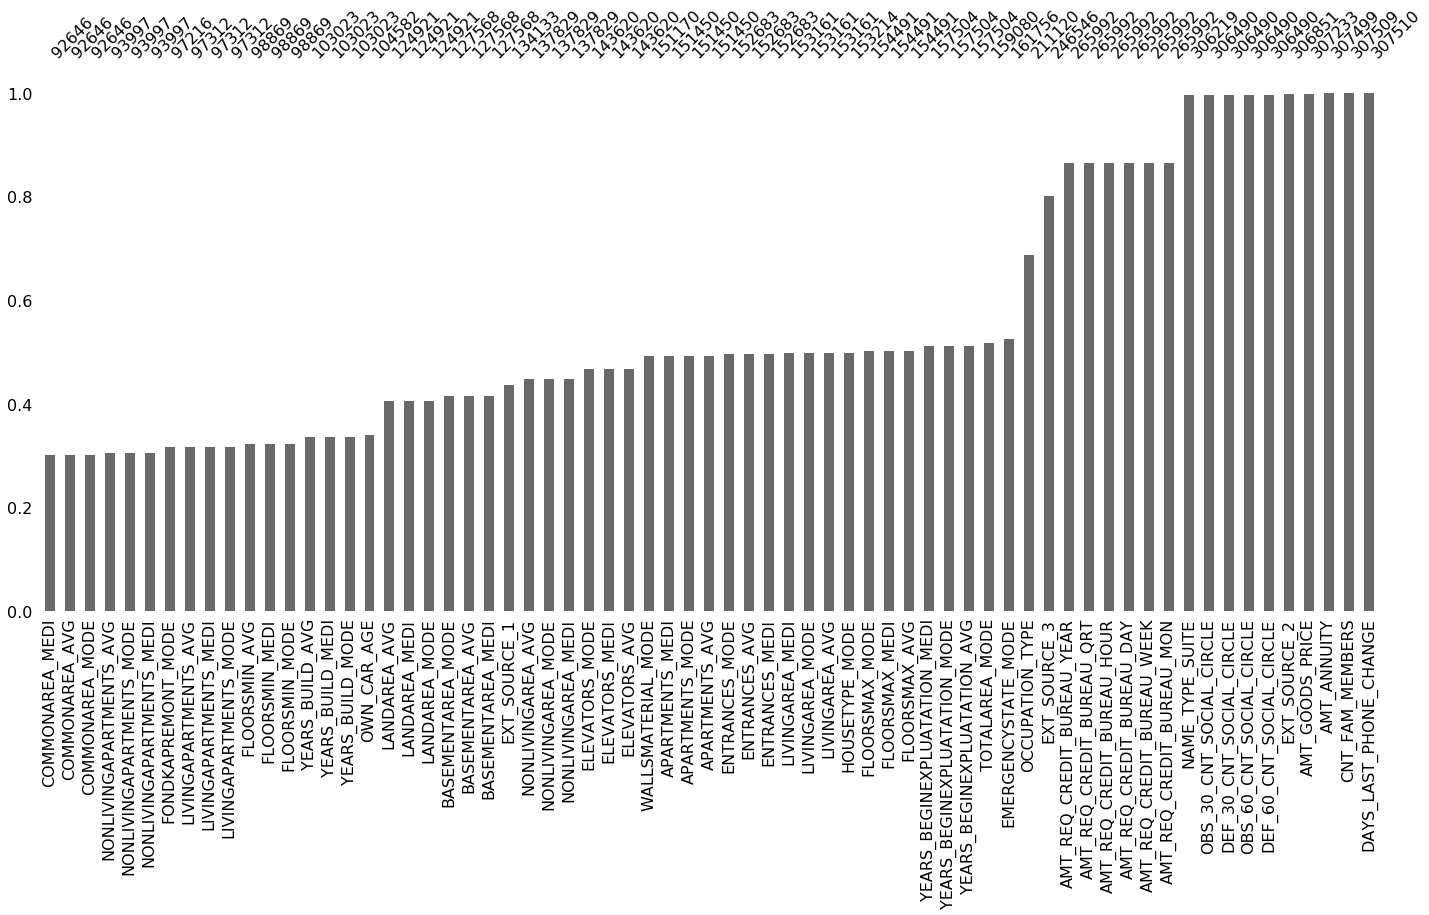

In [21]:
msno.bar(app_train[missingvals_cols])